##<h2>**1) INTRODUCTION**</h2>

*In this notebook we have tried to highlight some key indicators, called risk factors, that lead to the onset of the disease.   These are drawn from a wide range of age groups, gender and health conditions. Controlling them can effectively prevent heart disease

1.1) **We import all necessary modules**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

1.2) **loading the dataset**

In [ ]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##<h2>**2) OVERVIEW OF THE DATA**</h2>

Data contains:

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type (4 types)
* trestbps - resting blood pressure (in mm Hg on admission  to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB




*   we have 0 missing values
*   all variables are numeric 




In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##<h2>**3) EXPLORATORY DATA ANALYSIS**</h2>

**3.1) univariate analysis**

* **The target value distribution** 

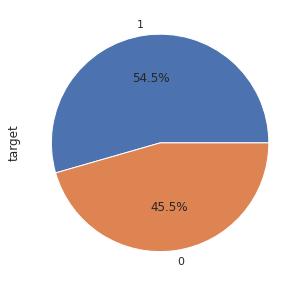

In [ ]:
plt.figure(figsize=(8,5))
data['target'].value_counts().plot.pie(autopct="%1.1f%%")

54.5% of the sample have heart disease 

* **Feautures distribution**

     **i) categorical features**

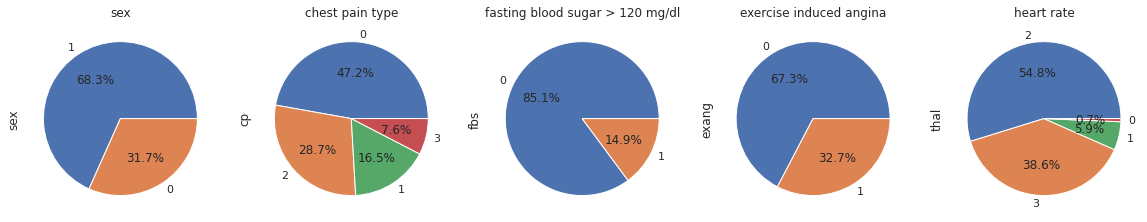

In [ ]:
plt.figure(figsize=(20,18))
plt.subplot(1,5,1)
data["sex"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("sex")
plt.subplot(1,5,2)
data["cp"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("chest pain type")
plt.subplot(1,5,3)
data["fbs"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("fasting blood sugar > 120 mg/dl")
plt.subplot(1,5,4)
data["exang"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("exercise induced angina")
plt.subplot(1,5,5)
data["thal"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("heart rate")

plt.show()

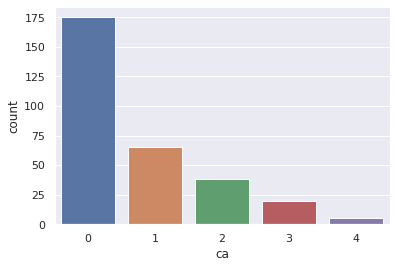

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="ca", data=data )

  **ii) numerical features**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


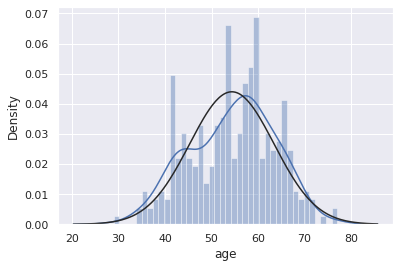

In [ ]:
sns.distplot(data["age"], bins=  40,fit=norm,hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


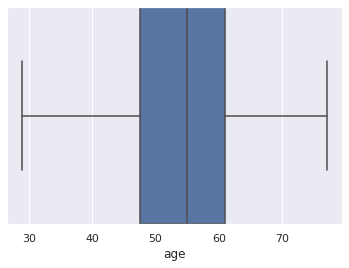

In [ ]:
sns.boxplot(data["age"],width=1)

*   Maximum=77

*   Minimum=29

*   Median=54

*   Q1=49

*   Q3=60

*   range=max-min= 18

*   Interquartile Range =Q3-Q1=60-29=31

**3.2) Multivariate analysis**

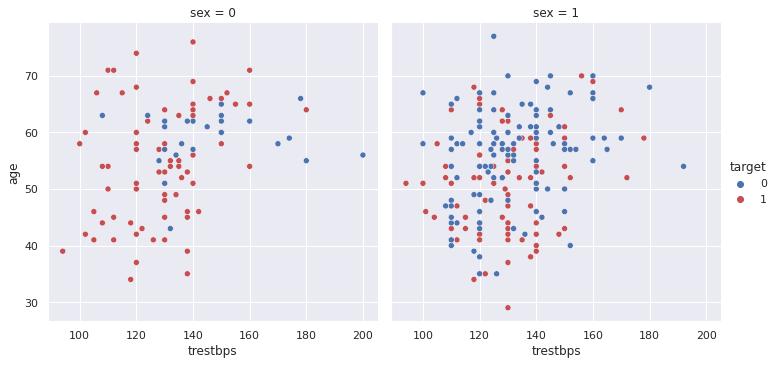

In [ ]:
sns.relplot(
    data=data, x="trestbps", y="age", col="sex",
    hue="target",
    palette=["b", "r"], sizes=(10, 100)
)

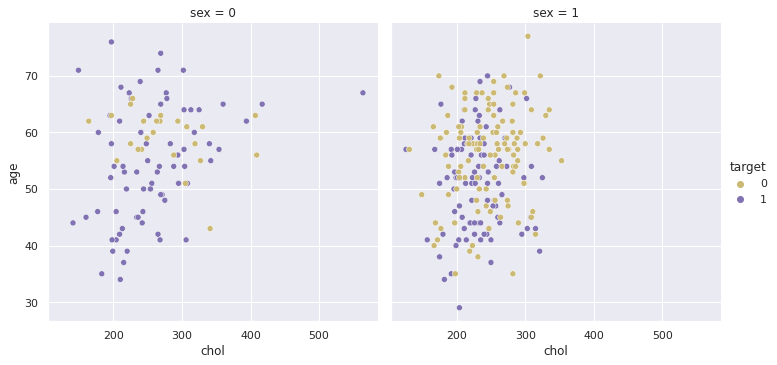

In [ ]:
sns.relplot(
    data=data, x="chol", y="age", col="sex",
    hue="target",
    palette=["y", "m"], sizes=(10, 100)
)

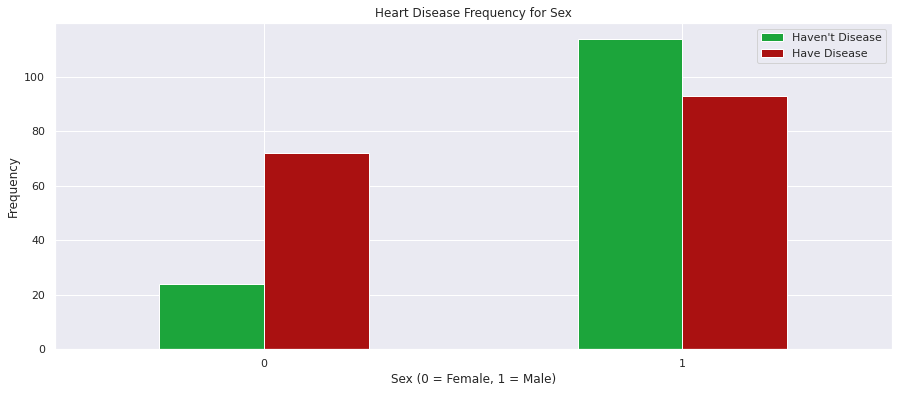

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

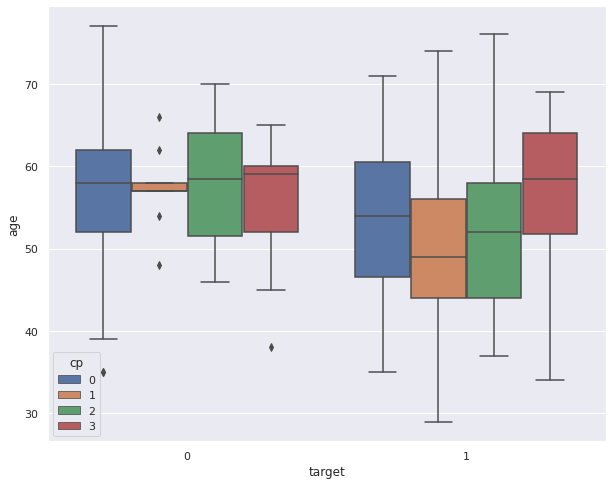

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='target',y='age',data=data,hue='cp')

**3.3) Total Correlations Between the Features**

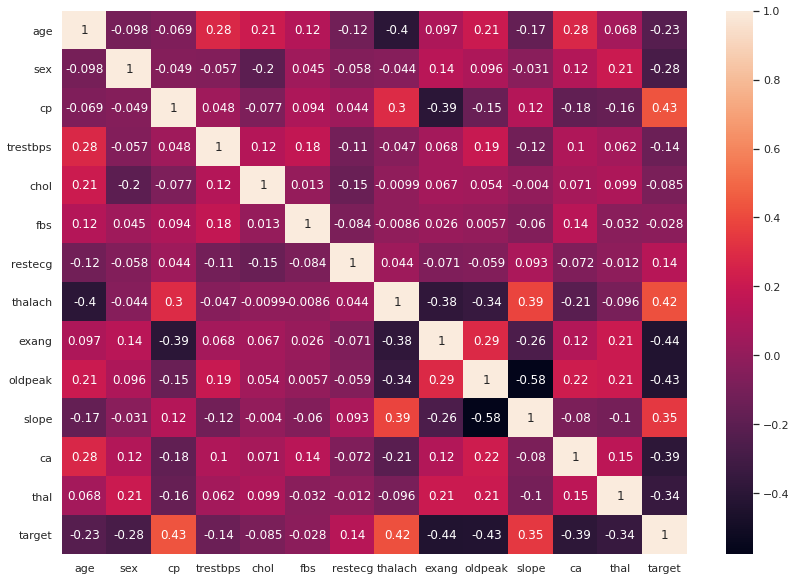

In [ ]:
plt.figure(figsize=(14,10))
corr = data.corr()
sns.heatmap(corr, annot = True)

##<h2>**4) DATA MODELING**</h2>

*  In this study, we notice that we are facing supervised data since we have the output column which is "stroke". We therefore use the supervised learning algorithms 

**4.1)  Feature selection**

In [ ]:
x= data.drop(['target'], axis = 1)
y = data.target.values

**4.3)  Split the dataset into a training set and a testing set**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

**4.4) Model : Random Forest** 

In [ ]:
model = RandomForestClassifier(max_depth=5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

**4.4) Model evaluation**

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[26,  7],
       [ 1, 27]])

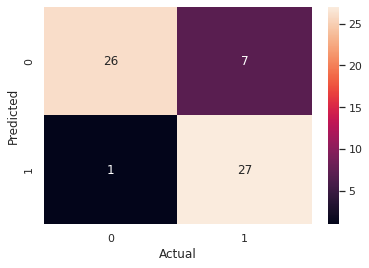

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



In [ ]:
RF_roc_auc = roc_auc_score(y_test, y_predict)
print("Precision:",RF_roc_auc)

Precision: 0.8760822510822511


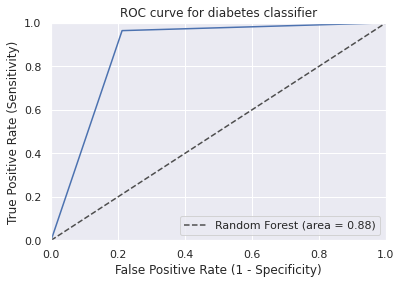

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3",label='Random Forest (area = %0.2f)' % RF_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:

RF_ac = accuracy_score(y_test, y_predict)
print('The Random Forest accuracy is ', RF_ac)

The Random Forest accuracy is  0.8688524590163934
